[INFO] 
labels: 
 [0 1 2 3 4 5 6 7 8 9] 
count per class 
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Training set dimensions: 60000 x 784
Test set dimensions: 10000 x 784
5


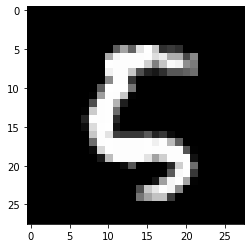

In [1]:
#load data
import numpy as np
import matplotlib.pyplot       as plt
from mlxtend.data import loadlocal_mnist

X_train, y_train = loadlocal_mnist(
        images_path='MNIST/train-images-idx3-ubyte', 
        labels_path='MNIST/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(
        images_path='MNIST/t10k-images-idx3-ubyte', 
        labels_path='MNIST/t10k-labels-idx1-ubyte')

labels,count_class = np.unique(y_train,return_counts=True)

print('[INFO] \nlabels: \n %s \ncount per class \n %s' % (labels,count_class))
print('Training set dimensions: %s x %s' % (X_train.shape[0],X_train.shape[1]))
print('Test set dimensions: %s x %s' % (X_test.shape[0], X_test.shape[1]))

dim1=28
dim2=28     
image = X_train[2000].reshape((28,28))
print(y_train[2000])
plt.imshow(image,cmap="gray");



In [2]:
#multilayer feedforward
from keras.models import Sequential
from keras.layers import Dense

In [3]:
num_classes = labels.size
nu_hl1 = 400
nu_hl2 = 200
nu_hl3 = 100
nu_hl4 = num_classes


model = Sequential()
model.add(Dense(nu_hl1, input_dim=dim1*dim2, activation='relu'))
model.add(Dense(nu_hl2, activation='relu'))
model.add(Dense(nu_hl3, activation='relu'))
model.add(Dense(nu_hl4, activation='softmax'))  #sigmoid
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 415,310
Trainable params: 415,310
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train, num_classes=num_classes)
test_labels = to_categorical(y_test, num_classes=num_classes)

print('convertir: ',y_train[0],' a one hot encoding : ',train_labels[0])

convertir:  5  a one hot encoding :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
#'binary_crossentropy'
#'categorical_crossentropy'

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, train_labels, epochs=5, batch_size=10)

Epoch 1/5
6000/6000 [==============================] - 112s 19ms/step - loss: 0.7228 - accuracy: 0.8947
Epoch 2/5
6000/6000 [==============================] - 98s 16ms/step - loss: 0.2223 - accuracy: 0.9425
Epoch 3/5
6000/6000 [==============================] - 99s 16ms/step - loss: 0.1820 - accuracy: 0.9562
Epoch 4/5
6000/6000 [==============================] - 101s 17ms/step - loss: 0.1689 - accuracy: 0.9615
Epoch 5/5
6000/6000 [==============================] - 106s 18ms/step - loss: 0.1540 - accuracy: 0.9665


In [6]:
predictions = model.predict(X_test)
predictions[0]

array([3.4098809e-37, 5.1776568e-29, 2.6640393e-22, 1.8031729e-27,
       1.6270138e-18, 5.6070799e-37, 0.0000000e+00, 1.0000000e+00,
       1.8958944e-22, 2.0177459e-22], dtype=float32)

In [7]:
predictions = model.predict_classes(X_test)
predictions[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


7

In [8]:
print("etiqueta 10 primeras imagenes de prueba:  ",y_test[:10],\
      "\nprediccion 10 primeras imagenes de prueba:",predictions[:10])

etiqueta 10 primeras imagenes de prueba:   [7 2 1 0 4 1 4 9 5 9] 
prediccion 10 primeras imagenes de prueba: [7 2 1 0 4 1 4 9 6 9]


In [9]:
_, accuracy = model.evaluate(X_test, test_labels)
print('Accuracy: %.2f' % (accuracy*100))


313/313 [==============================] - 3s 8ms/step - loss: 0.2052 - accuracy: 0.9608
Accuracy: 96.08
